In [1]:
from gensim.models.word2vec import Word2Vec
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [4]:
model_path = './model/word2vec_baike'

In [5]:
model = Word2Vec.load(model_path)

In [6]:
print(model.wv)
print(type(model.wv))

<class 'gensim.models.keyedvectors.Word2VecKeyedVectors'>


In [35]:
model.wv.most_similar('外科医生')

[('内科医生', 0.7897337675094604),
 ('脑外科', 0.7203871011734009),
 ('医生', 0.7105675935745239),
 ('眼科医生', 0.7006645202636719),
 ('主治医生', 0.6824816465377808),
 ('骨科医生', 0.6773808598518372),
 ('妇科医生', 0.6699066162109375),
 ('住院医生', 0.6633644104003906),
 ('麻醉师', 0.6622591018676758),
 ('女医生', 0.6616170406341553)]

In [5]:
word_1 = np.array(model.wv['高兴'])
word_1.shape # 256

(256,)

In [6]:
print(model.wv.most_similar('高兴'))
print(model.wv.most_similar(negative = '高兴')[::-1])

[('开心', 0.7087408304214478), ('欣喜', 0.7087163925170898), ('欣慰', 0.7034112215042114), ('非常高兴', 0.7004503011703491), ('着急', 0.6957135796546936), ('气愤', 0.6923327445983887), ('吃惊', 0.6922367811203003), ('兴高采烈', 0.6896808743476868), ('十分高兴', 0.6825441122055054), ('太高兴', 0.6794086694717407)]
[('Split', 0.0789966955780983), ('萝丝', 0.07986611127853394), ('W-ENCORE', 0.08196917921304703), ('Slam', 0.084231898188591), ('艾米·亚当斯', 0.0847877487540245), ('Zodiac', 0.08491254597902298), ('Ironman', 0.0855162963271141), ('Millie', 0.08655242621898651), ('Divide', 0.08740637451410294), ('Bravo', 0.09582312405109406)]


In [7]:
# 分析最相似的3个词语
sim_vocab = [i[0] for i in model.wv.most_similar('高兴')]
print(sim_vocab)
word_label = sim_vocab[:3]
word_label.append('高兴')
print(word_label)

['开心', '欣喜', '欣慰', '非常高兴', '着急', '气愤', '吃惊', '兴高采烈', '十分高兴', '太高兴']
['开心', '欣喜', '欣慰', '高兴']


In [8]:
word_vec = np.array([model.wv.__getitem__(word) for word in word_label])
print(word_vec)
print(word_vec.shape)

[[ 0.23555957 -0.251711   -0.15305421 ...  0.21551256 -0.3940516
  -0.3102844 ]
 [-0.07600175 -0.12373175  0.00355309 ... -0.01861497 -0.34579444
  -0.319155  ]
 [-0.01789067  0.02954866 -0.13965516 ... -0.1347529  -0.31135568
  -0.2566646 ]
 [ 0.11903173 -0.2827729  -0.0830032  ...  0.02874595 -0.25065872
  -0.02475399]]
(4, 256)


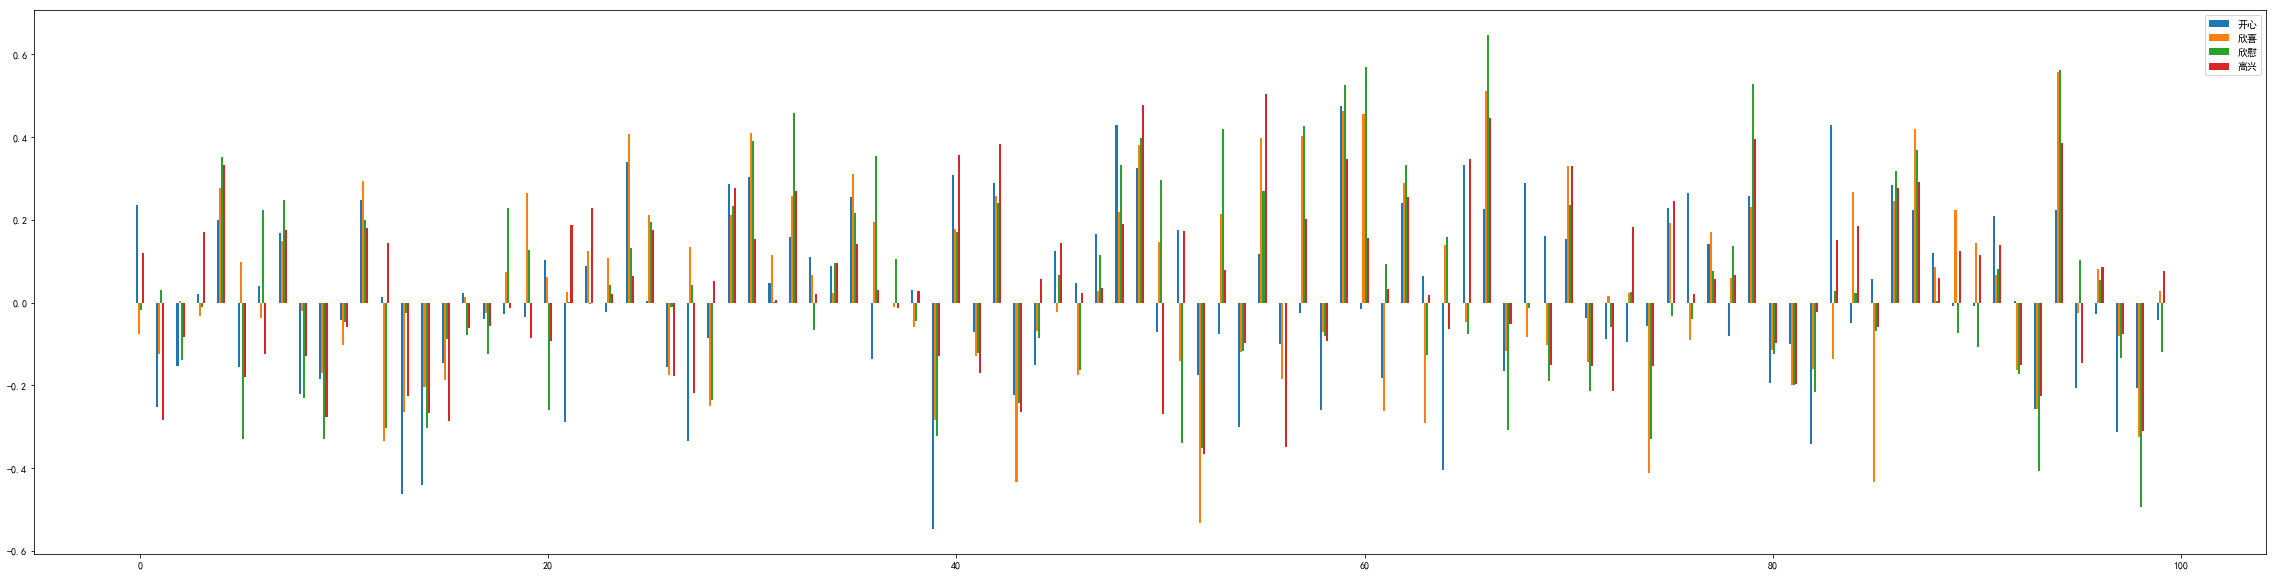

In [9]:
width = 0.1
x = np.arange(0, 100, 1)
plt.figure(figsize=(40, 10))
plt.bar(x - 3*width/2, word_vec[0][:100], width, label=word_label[0])
plt.bar(x - width/2, word_vec[1][:100], width, label=word_label[1])
plt.bar(x + width/2, word_vec[2][:100], width, label=word_label[2])
plt.bar(x + 3*width/2, word_vec[3][:100], width, label=word_label[3])
plt.legend()
plt.savefig('0.png')
plt.show()

In [10]:
t = word_vec.min()
word_vec -= t
print(word_vec)

[[0.96816325 0.48089266 0.57954943 ... 0.94811624 0.33855206 0.42231926]
 [0.6566019  0.60887194 0.73615676 ... 0.7139887  0.38680923 0.41344866]
 [0.714713   0.7621523  0.5929485  ... 0.5978508  0.421248   0.47593907]
 [0.8516354  0.44983077 0.64960045 ... 0.7613496  0.48194495 0.7078497 ]]


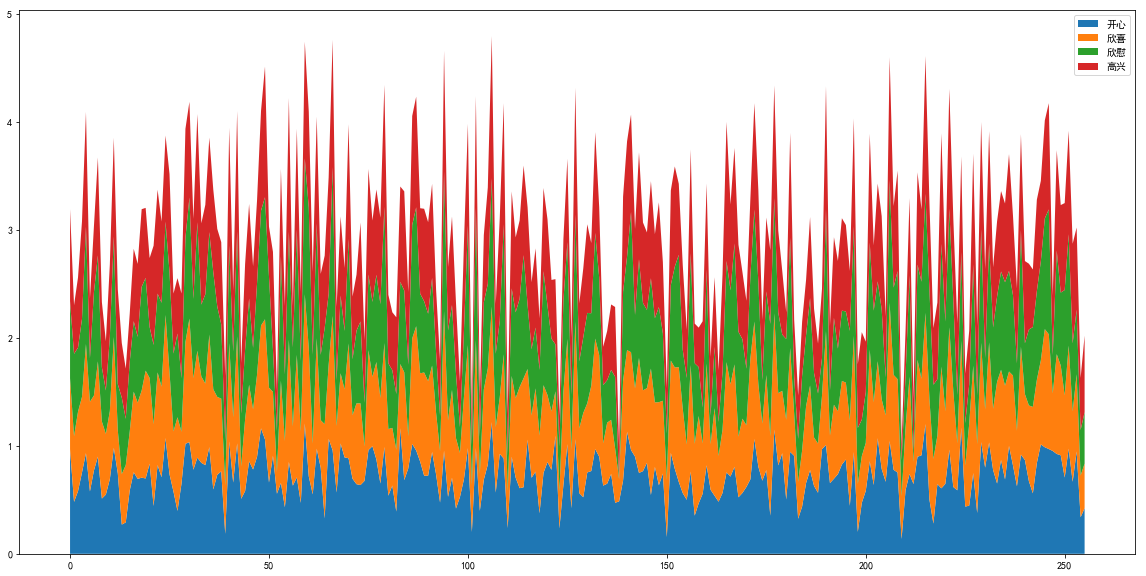

In [11]:
x = np.arange(0.0,256,1)
plt.figure(figsize=(20, 10))
# plt.stackplot(x, word_1, labels = '高兴')
# for i in range(0,3):
#     plt.stackplot(x, word_vec[i], labels = sim_vocab[i])
plt.stackplot(x, word_vec, labels = word_label)
plt.legend()
plt.savefig('1.png')
plt.show()

In [12]:
# 分析最不相似的3个词语
neg_sim_vocab = [i[0] for i in model.wv.most_similar(negative = '高兴', topn=10)[::-1]]
# print(neg_sim_vocab)
neg_word_label = neg_sim_vocab[:3]
neg_word_label.append('高兴')
print(neg_word_label)

['Split', '萝丝', 'W-ENCORE', '高兴']


In [13]:
neg_word_vec = np.array([model.wv.__getitem__(word) for word in neg_word_label])
print(neg_word_vec)

[[ 5.72268844e-01 -1.25641212e-01 -3.88652176e-01 ...  5.07983685e-01
   1.44655287e-01  2.33555302e-01]
 [ 8.14909860e-02 -2.51882732e-01  2.51369655e-01 ...  7.55133867e-01
  -4.11523223e-01  6.36922345e-02]
 [ 1.62491901e-03 -3.95497744e-04 -9.26942099e-04 ...  4.83004842e-04
   2.58968212e-04  1.64715562e-03]
 [ 1.19031735e-01 -2.82772899e-01 -8.30032006e-02 ...  2.87459530e-02
  -2.50658721e-01 -2.47539897e-02]]


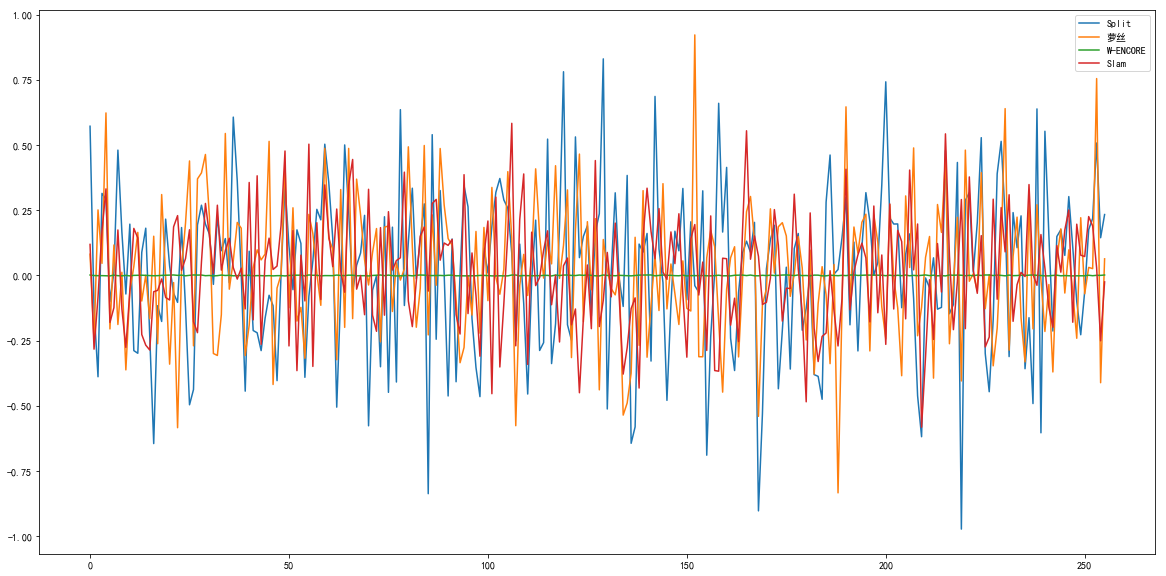

In [14]:
plt.figure(figsize=(20, 10))
for i in range(0,4):
    plt.plot(x, neg_word_vec[i], label = neg_sim_vocab[i])
plt.legend()
plt.savefig('2.png')
plt.show()

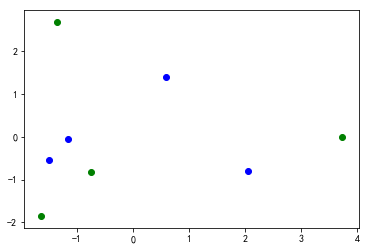

In [15]:
# PCA降维并可视化

pca = PCA(n_components=2)
new_word_vec = pca.fit_transform(word_vec)
new_neg_word_vec = pca.fit_transform(neg_word_vec)
plt.scatter(new_word_vec[:,0], new_word_vec[:,1],c='b')
plt.scatter(new_neg_word_vec[:,0], new_neg_word_vec[:,1],c='g')
plt.savefig('3.png')
plt.show()

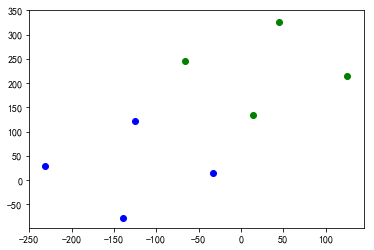

In [16]:
# TSNE降维并可视化

tsne = TSNE(n_components=2)
new_word_vec = tsne.fit_transform(word_vec)
new_neg_word_vec = tsne.fit_transform(neg_word_vec)
plt.scatter(new_word_vec[:,0], new_word_vec[:,1],c='b')
plt.scatter(new_neg_word_vec[:,0], new_neg_word_vec[:,1],c='g')
plt.savefig('4.png')
plt.show()

In [17]:
len(model.wv.vocab)

1056283

In [30]:
word_list_gx = [i[0] for i in model.wv.most_similar('高兴')]
word_list_gx.extend([i[0] for i in model.wv.most_similar(negative = '高兴')])

In [31]:
word_list_gx

['开心',
 '欣喜',
 '欣慰',
 '非常高兴',
 '着急',
 '气愤',
 '吃惊',
 '兴高采烈',
 '十分高兴',
 '太高兴',
 'Bravo',
 'Divide',
 'Millie',
 'Ironman',
 'Zodiac',
 '艾米·亚当斯',
 'Slam',
 'W-ENCORE',
 '萝丝',
 'Split']

In [32]:
word_vec_gx = np.array([model.wv.__getitem__(word) for word in word_list_gx])

In [35]:
tsne = TSNE(n_components=3)
new_word_vec_gx = tsne.fit_transform(word_vec_gx)
x_min, x_max = np.min(new_word_vec_gx, 0), np.max(new_word_vec_gx, 0)
new_word_vec_gx /= (x_max - x_min)
print(new_word_vec_gx.shape)

(20, 3)


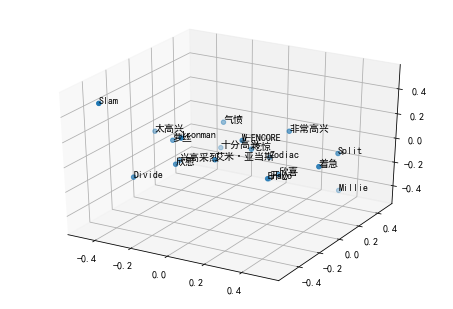

In [64]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
for i in range(len(word_list_gx)):
    ax.text(new_word_vec_gx[i,1], new_word_vec_gx[i,0], new_word_vec_gx[i,2], word_list_gx[i])
ax.scatter(new_word_vec_gx[:,1], new_word_vec_gx[:,0], new_word_vec_gx[:,2])
plt.savefig('5.png')
plt.show()

In [62]:

new_word_vec_gx[0]

array([ 0.26717648,  0.06078555, -0.3505445 ], dtype=float32)

In [51]:
model['洗碗工']
# model['保洁工']
# model.wv.similarity('保洁员', '保洁工')
model.wv.most_similar('摄像师')

D:\IDEs\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('摄影师', 0.7465420961380005),
 ('剪辑师', 0.7382868528366089),
 ('化妆师', 0.7319339513778687),
 ('灯光师', 0.7192586660385132),
 ('剪辑', 0.687404990196228),
 ('编导', 0.6724793314933777),
 ('音效师', 0.6707240343093872),
 ('特技师', 0.6626539826393127),
 ('服装师', 0.6502685546875),
 ('造型师', 0.649614691734314)]

In [4]:
model['教师']

D:\IDEs\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 9.06082522e-03, -7.01513812e-02,  1.19228065e-01,  1.82872713e-01,
        1.16549768e-01,  4.37986046e-01,  3.40000242e-01,  3.53993803e-01,
       -4.01276648e-01, -1.98025703e-01,  1.64619476e-01, -3.67353827e-01,
       -5.95720601e-04,  3.29139866e-02, -1.08404279e-01,  1.79910690e-01,
        8.17239061e-02, -3.71156305e-01,  7.42040277e-02,  4.07910079e-01,
        4.12435889e-01,  2.30940282e-02, -2.41662502e-01,  5.14573216e-01,
        1.14731871e-01, -1.55239269e-01, -3.35294038e-01,  3.76964025e-02,
       -3.44285011e-01,  2.85288036e-01,  3.36519688e-01,  2.28931904e-01,
       -6.87327236e-02, -3.96833658e-01, -9.69678015e-02, -2.75809675e-01,
       -6.98804557e-02,  2.02794954e-01,  1.10741630e-01,  7.82168433e-02,
       -5.54775834e-01, -3.11834455e-01,  4.02836800e-01,  2.10346088e-01,
        1.84108764e-01, -1.65484637e-01, -1.06866077e-01,  4.03862596e-01,
       -1.05393648e-01, -2.46612653e-01,  1.61443621e-01, -2.26246536e-01,
       -7.57956579e-02, -

In [34]:
with open('./class/profs.txt') as f:
    for word in f.readlines():
        word = word.strip()
        for i in model.wv.most_similar(word):
            print(i[0])

裁判员
判罚
裁判长
主裁判
法官
足球裁判
国际裁判
裁决
裁判组
公诉人
教练员
裁判长
裁判
国际裁判
裁判组
评判员
司线员
主裁判
手球
门球
裁判员
总裁判
裁判
裁判组
国际裁判
主裁判
评判员
计时员
司线员
裁委会
主裁
判罚
球证
边裁
点球
裁判
罚下
主罚
裁判员
鸣哨
检察官
法院
大法官
最高法院
司法人员
律师
公诉人
司法
陪审员
辩护律师
主任
秘书
任
副主任
科长
科员
研究员
讲师
技术员
助理工程师
煤矿工人
工人
铁路工人
工友
矿主
建筑工人
伐木工
消防员
井下
矿上
副科长
科科长
股长
科员
处长
副处长
组织科
主任科员
副局长
秘书科
副研究员
客座教授
教授
副所长
博士生
副教授
研究所
副院长
博导
客座
法官
律师
辩护律师
最高法院
大法官
检察机关
公诉人
警官
司法人员
法院
造型师
化妆师
灯光师
道具师
摄像师
彩妆师
摄影师
陈同勋
发型师
陈姝瑭
钳工
电焊工
维修电工
操作工
车工
电焊
钣金工
铆工
电工
铣工
焊工
操作工
架子工
铆工
钳工
电焊
钣金工
车工
砌筑工
涂装工
维修电工
电工材料
钳工
电子技术
电工仪表
焊工
电气
电气设备
低压电器
电子电路
营业员
店员
收银员
采购员
推销员
销售员
促销员
导购员
售票员
业务员
促销员
销售员
店长
营业员
店员
业务员
推销员
导购
营销员
营业人员
中国美术家协会
美术家协会
专职画家
工艺美术师
中国书法家协会
艺委会
美协
画院
国画家
国画院
焊工
车工
安装工
维修电工
砌筑工
维修工
铣工
钳工
装配工
检修工
维修电工
汽车修理工
操作工
装配工
安装工
钳工
车工
机修钳工
检修工
修理工
音乐家
舞蹈演员
戏剧家
歌唱家
演奏家
艺术家
芭蕾舞
文艺家
钢琴家
中国舞蹈家协会
高级技师
技工
高级技工
高级工
考评员
中级
烹调师
工程师
中级工
职业技能
安装工
维修工
操作工
车工
铣工
钳工
维修电工
机修钳工
钣金工
装配钳工
作曲家
舞蹈家
演奏家
指挥家
歌唱家
钢琴家
艺术家
戏剧家
词曲作家
小提琴家
剧作家
音乐家
舞蹈家
戏曲家
散文家
作家
中国戏剧家协会
剧协
作协
翻译家
女高音
男高音
演奏家
指挥家
钢琴家
作曲家
歌唱演员
音乐家
小提琴家
男中音
维修电工
安装工
操